# Some fun with clustering

In [16]:
%matplotlib inline

In [17]:
import numpy as np

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Some toy data to test few things

In [39]:
data ={"I1" : [1,1,1,0,0,0,0,0,0,1,1,1,1,1],
       "I2" : [1,1,1,0,0,0,0,0,0,1,1,1,1,1],
        "I3" : [1,1,1,0,0,0,0,0,0,1,1,1,1,1],
        "I4" : [1,1,1,0,0,0,0,0,0,1,1,1,1,1],
        "I5" : [0,0,0,1,1,1,0,0,0,0,0,0,0,0],
        "I6" : [0,0,0,0,1,1,0,0,0,0,0,0,0,0],
        "I7" : [1,1,1,0,0,0,0,0,0,0,0,0,0,0],
        "I8" : [1,1,1,0,0,0,0,0,0,0,0,0,0,0],
        "I9" : [1,1,1,0,0,0,0,0,0,0,0,0,0,0]
      }

In [40]:
df = pd.DataFrame(data)

In [41]:
df

,I1,I2,I3,I4,I5,I6,I7,I8,I9
0,1,1,1,1,0,0,1,1,1
1,1,1,1,1,0,0,1,1,1
2,1,1,1,1,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0
5,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0


In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
# This is ok, but we have to guess the number of cluser first
agglo_cluster = AgglomerativeClustering(linkage="ward", n_clusters=5)

In [44]:
agglo_cluster.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5, n_components=None,
            pooling_func=<function mean at 0x7fbd14042488>)

In [45]:
def print_clusters(clustering):
    d_res = {}
    for (row, label) in enumerate(clustering.labels_):
      print "row {0} has label {1}".format(row, label)
      if label in d_res:
        d_res[label].append(row)
      else:
        d_res[label] = [row]
    print "-"*40
    for label, cluster in d_res.items():
        print "Group: {0} has elements: :{1}".format(label, cluster)
    

In [46]:
print_clusters(agglo_cluster)

row 0 has label 2
row 1 has label 2
row 2 has label 2
row 3 has label 4
row 4 has label 3
row 5 has label 3
row 6 has label 1
row 7 has label 1
row 8 has label 1
row 9 has label 0
row 10 has label 0
row 11 has label 0
row 12 has label 0
row 13 has label 0
----------------------------------------
Group: 0 has elements: :[9, 10, 11, 12, 13]
Group: 1 has elements: :[6, 7, 8]
Group: 2 has elements: :[0, 1, 2]
Group: 3 has elements: :[4, 5]
Group: 4 has elements: :[3]


In [47]:
# We could use a DBSCAN
# This guess the number of clusters
from sklearn.cluster import DBSCAN

In [48]:
dbscan = DBSCAN()

In [49]:
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)

In [50]:
print_clusters(dbscan)

row 0 has label -1
row 1 has label -1
row 2 has label -1
row 3 has label -1
row 4 has label -1
row 5 has label -1
row 6 has label -1
row 7 has label -1
row 8 has label -1
row 9 has label 0
row 10 has label 0
row 11 has label 0
row 12 has label 0
row 13 has label 0
----------------------------------------
Group: 0 has elements: :[9, 10, 11, 12, 13]
Group: -1 has elements: :[0, 1, 2, 3, 4, 5, 6, 7, 8]


(-0.2, 1.2)

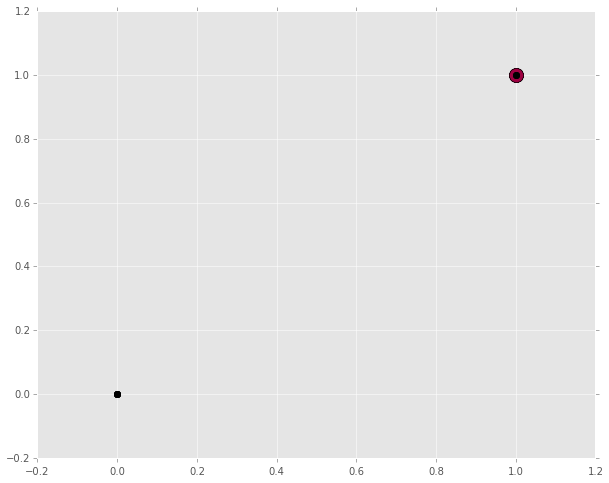

In [56]:
labels = dbscan.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
X = df.values

plt.figure(figsize=(10,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

In [57]:
# Not really exciting